# root locus with proper annotations of design points

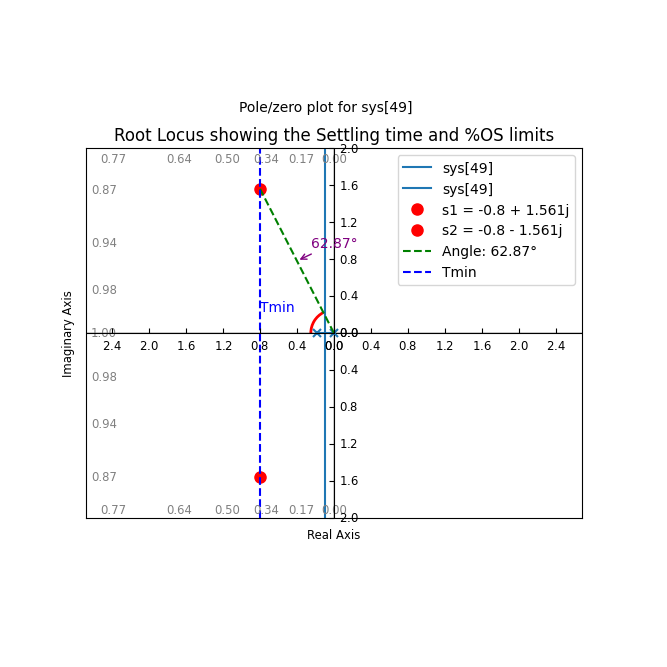

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from matplotlib.patches import Arc

# Transfer function
num = [23.85]
den = [5.44, 1, 0]
G = ctrl.TransferFunction(num, den)

# Create root locus
plt.figure()
ctrl.root_locus(G)  # Plot the root locus
plt.title('Root Locus showing the Settling time and %OS limits')

# Mark specific points
s1 = -0.8 + 1.561j
s2 = -0.8 - 1.561j
plt.plot(np.real(s1), np.imag(s1), 'ro', markersize=8, label='s1 = -0.8 + 1.561j')
plt.plot(np.real(s2), np.imag(s2), 'ro', markersize=8, label='s2 = -0.8 - 1.561j')

# Calculate the angle of s1 with respect to the origin
theta_rad = np.arctan2(np.imag(s1), np.real(s1))  # Angle in radians
theta_deg = 180 - np.degrees(theta_rad)  # Convert to degrees

# Calculate reflected angle
reflected_theta_deg = 360 - theta_deg

# Adjust arc angles based on theta_deg to ensure it's in the second quadrant
arc1_theta1 = 180 - theta_deg if theta_deg > 0 else 0
arc1_theta2 = 180
arc2_theta1 = 180
arc2_theta2 = 180 + reflected_theta_deg

# Plot the angle line for the original point
plt.plot([0, np.real(s1)], [0, np.imag(s1)], 'g--', label=f'Angle: {theta_deg:.2f}°')

# Annotate the angle on the plot for the original point
plt.annotate(f'{theta_deg:.2f}°', xy=(np.real(s1) / 2, np.imag(s1) / 2),
             xytext=(10, 10), textcoords='offset points', color='purple',
             arrowprops=dict(arrowstyle="->", color='purple'))

# Calculate reflected point coordinates
reflected_s1 = np.conj(s1)  # Conjugate for reflection across y-axis


# Draw a vertical line at -0.8 and annotate it as Tmin
plt.axvline(x=-0.8, color='blue', linestyle='--', label='Tmin')
plt.text(-0.8, 0.2, 'Tmin', color='blue', verticalalignment='bottom', fontsize=10)

# Draw arcs indicating the angles at the origin
arc1 = Arc([0, 0], 0.5, 0.5, theta1=arc1_theta1, theta2=arc1_theta2, color='red', lw=2)
#arc2 = Arc([0, 0], 0.5, 0.5, theta1=arc2_theta1, theta2=arc2_theta2, color='purple', lw=2, linestyle='--')
plt.gca().add_patch(arc1)
#plt.gca().add_patch(arc2)

# Customize grid
plt.grid()
plt.axis('equal')
plt.xlim([-2, 2])  # Increase x-axis scale
plt.ylim([-2, 2])  # Increase y-axis scale
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.legend()
plt.show()

# Compensator root locus

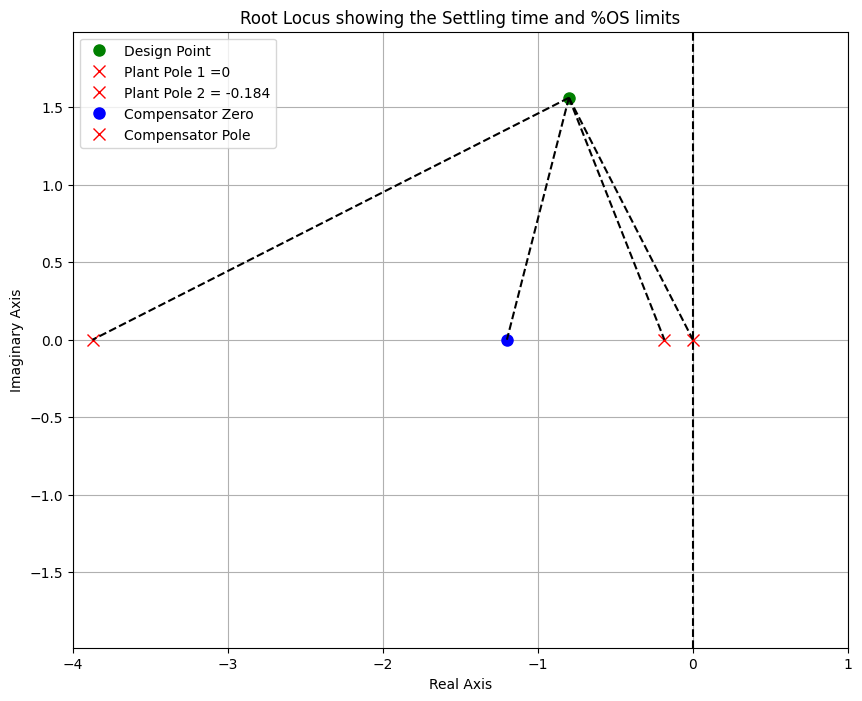

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Define the values
design_point = -0.8 + 1.561j  # Design Point
plant_pole1 = 0  # Plant Pole 1
plant_pole2 =- 1 / 5.44  # Plant Pole 2
comp_zero = -1.2  # Compensator Zero
comp_pole = -3.873  # Compensator Pole

# Replace the settling time pole with a new value
settling_time_pole = -2.0  # New Settling Time Pole

# Create the plot
plt.figure(figsize=(10, 8))
plt.grid(True)
plt.axis('equal')

# Adjust x and y limits for better visualization
plt.xlim(-4, 1)
plt.ylim(-4, 4)

plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')

# Plot the design point
plt.plot(np.real(design_point), np.imag(design_point), 'go', markersize=8, label='Design Point')

# Plot the poles and zero (distinguish zeros with circles)
plt.plot(plant_pole1, 0, 'rx', markersize=8, label='Plant Pole 1 =0 ')
plt.plot(plant_pole2, 0, 'rx', markersize=8, label='Plant Pole 2 = -0.184')
plt.plot(comp_zero, 0, 'bo', markersize=8, label='Compensator Zero')  # Use circle for zero
plt.plot(comp_pole, 0, 'rx', markersize=8, label='Compensator Pole')
#plt.plot(settling_time_pole, 0, 'rx', markersize=8, label='Settling Time Pole')

# Draw lines from the design point to the poles and zero
plt.plot([np.real(design_point), plant_pole1], [np.imag(design_point), 0], 'k--')
plt.plot([np.real(design_point), plant_pole2], [np.imag(design_point), 0], 'k--')
plt.plot([np.real(design_point), comp_zero], [np.imag(design_point), 0], 'k--')
plt.plot([np.real(design_point), comp_pole], [np.imag(design_point), 0], 'k--')
#plt.plot([np.real(design_point), settling_time_pole], [np.imag(design_point), 0], 'k--')

# Calculate angles for each pole and zero with respect to the design point
def calculate_angle(point):
    angle_rad = np.arctan2(np.imag(point) - np.imag(design_point), np.real(point) - np.real(design_point))
    return np.degrees(angle_rad)

angles = {
    'Plant Pole 1': calculate_angle(plant_pole1),
    'Plant Pole 2': calculate_angle(plant_pole2),
    'Comp Zero': calculate_angle(comp_zero),
    'Comp Pole': calculate_angle(comp_pole),
    #'Settling Time Pole': calculate_angle(settling_time_pole),
}

# Annotate the angles on the plot
for label, angle in angles.items():
    point = {
        'Plant Pole 1': plant_pole1,
        'Plant Pole 2': plant_pole2,
        'Comp Zero': comp_zero,
        'Comp Pole': comp_pole,
      #  'Settling Time Pole': settling_time_pole,
    }[label]
    
  
# Add a vertical line at the origin
plt.axvline(x=0, color='k', linestyle='--')

# Set the title
plt.title('Root Locus showing the Settling time and %OS limits')

# Show the plot
plt.legend()
plt.show()
